## Exploring the Historical Districts of Istanbul to Create a Historical Travel Planner

### 1. Introduction

##### 1.1 Background

Istanbul is a major city in Turkey that straddles Europe and Asia across the Bosphorus Strait. Its Old City reflects cultural influences of the many empires that once ruled here. In the Sultanahmet district, the open air , Roman-era Hippodrome was for centuries the site of chariot races, and Egyption obelisks also remain. The iconic Byzantine Hagia Sophia features a soar

##### 1.2 Problem

Travelling  to a city as historical and exciting as Istanbul can be overwhelming. Utilizing a planner can maximize 
valuable time, priotrize must-see historical places and plan for easier and faster traveln between attractions. This 
project aims to create an efficient travel planner that saves time, includes must-see attractions, and make suggestions
for what to see taking into account distance, time and location.

##### 1.3 Interest

Millions of visitors make the pilgrimage to Istanul every year to visit its historical attractions. These visitors
would be interested in the results of this project for their visit to Istanbul. Even Istanbul population can find
benefits for exploring their hometown or a new arrondissement with the results of our analysis using location data.

### 2.Data

##### 2.1 Data Source 

Venue data pulled from Foursquare's Places API would be used to perform the analysis. To get a reasonable amount of data points, they would be pulled from the search and explore points. Both of these endpoints return data on venues that are within
a specified radius of the central location provided.

The search API returns data on venues near a given location. The data returned can be tuned using the category parameter, and this parameter is used to narrow the results to only match venues categorized as Historical.


#### 2.2 Data Cleaning

Most of the data that was provided by the search results was delivery information or redundant location data. The data provided by Foursqures APIs included both the latitude and the longitude of every venue it returned. This was used for creating a map to visualize the density of historical places in the area.

The categories feature was also returned by Foursquare and was used to get the type of the historical place. The name and the addresss of the historical place was also kept to provide the user with more useful information.


#### 3. Methodolgy

I have used python folium to visualize geographic details of Istanbul its historical places and I created a map of Istanbul
with historical location superimposed on it. I've used Latitude and Longitude to get the visualise as below.

I utilized the Foursquare API to search for the Historical places and segment them. I made the Blue Mosque as the search centre
and the the radius of 50 km around it.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
import random  #library for random number generation
import json #library to handle json files

!pip install geopy
from geopy.geocoders import Nominatim # covert an adress to latitude and longitude

import requests # library to handle requests

from pandas.io.json import json_normalize # transform json file into a panada dataframe

# importing plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt #library for plotting

# backend for rendering plots within the browser
%matplotlib inline


# importing K-Means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

!pip install folium
import folium #map rendering library

print('Libraries imported')

Libraries imported


In [2]:
# Blue Mosque as the main historical site and it address(from Google)
address = 'Blue Mosque, Istanbul'

geolocator = Nominatim(user_agent="Istanbul_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The Geographical coordinates of Blue Mosque are {}, {}.'.format(latitude, longitude))

The Geographical coordinates of Blue Mosque are 41.0052619, 28.9768725.


In [3]:
#Foursqure Credentials and parameters
CLIENT_ID = "OLHRDU1N0XQXNQUDHDINJBDI3JOIFZRBWJ2L1T3TZHCJAWYN"
CLIENT_SECRET = "PWGBI2KUE2JIL0VNTIFFPN2EEQGA5FMGCOIWH1NGBQF51MDW"
VERSION='20180604'
LIMIT=30
radius=50000
search_query='Historic'

In [4]:
#search Foursqure for historical places around Blue Mosque
url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}\
&ll={},{}&v={}&query={}&radius={}'.format(CLIENT_ID,CLIENT_SECRET,latitude,longitude,VERSION,search_query,radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=OLHRDU1N0XQXNQUDHDINJBDI3JOIFZRBWJ2L1T3TZHCJAWYN&client_secret=PWGBI2KUE2JIL0VNTIFFPN2EEQGA5FMGCOIWH1NGBQF51MDW&ll=41.0052619,28.9768725&v=20180604&query=Historic&radius=50000'

In [5]:
#request the data table from Foursquare and assign it a dict
istanbul_data=requests.get(url).json()
istanbul_data


{'meta': {'code': 200, 'requestId': '5cb946dd4c1f6726865f3388'},
 'response': {'venues': [{'id': '4b732d5bf964a52011a02de3',
    'name': 'Galata Kulesi',
    'location': {'address': 'Bereketzade Mah. Büyük Hendek Cad. Galata',
     'lat': 41.02586182955209,
     'lng': 28.9750745544817,
     'distance': 2298,
     'postalCode': '34420',
     'cc': 'TR',
     'neighborhood': 'Bereketzade',
     'city': 'Beyoğlu',
     'state': 'İstanbul',
     'country': 'Türkiye',
     'formattedAddress': ['Bereketzade Mah. Büyük Hendek Cad. Galata',
      '34420 Beyoğlu',
      'Türkiye']},
    'categories': [{'id': '4deefb944765f83613cdba6e',
      'name': 'Historic Site',
      'pluralName': 'Historic Sites',
      'shortName': 'Historic Site',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/historicsite_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1555646173',
    'hasPerk': False},
   {'id': '4e870d4be5fa32b62a13643f',
    'name': '

In [6]:
# convert Dict to a Dataframe
venues=istanbul_data['response']['venues']
df_istanbul= json_normalize(venues)
df_istanbul.head(1)


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",False,4b732d5bf964a52011a02de3,Bereketzade Mah. Büyük Hendek Cad. Galata,TR,Beyoğlu,Türkiye,NaN,2298,"[Bereketzade Mah. Büyük Hendek Cad. Galata, 34...",NaN,41.025862,28.975075,Bereketzade,34420,İstanbul,Galata Kulesi,v-1555646173,NaN


In [7]:
#get tables columns' name
df_istanbul.columns

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.neighborhood', 'location.postalCode', 'location.state',
       'name', 'referralId', 'venuePage.id'],
      dtype='object')

In [8]:
# delete unwanted columns
df_istanbul_refined=df_istanbul.drop(['hasPerk','id','location.cc','location.country','location.formattedAddress',\
'location.labeledLatLngs','referralId'], axis=1)
df_istanbul_refined.columns

Index(['categories', 'location.address', 'location.city',
       'location.crossStreet', 'location.distance', 'location.lat',
       'location.lng', 'location.neighborhood', 'location.postalCode',
       'location.state', 'name', 'venuePage.id'],
      dtype='object')

In [9]:
df_istanbul_refined.head(1)

,categories,location.address,location.city,location.crossStreet,location.distance,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,venuePage.id
0,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",Bereketzade Mah. Büyük Hendek Cad. Galata,Beyoğlu,NaN,2298,41.025862,28.975075,Bereketzade,34420,İstanbul,Galata Kulesi,NaN


In [10]:
#bring name column to the front of the table
df_istanbul_refined_arranged=df_istanbul_refined[['name','categories','location.address',\
'location.city','location.distance','location.lat','location.lng',]]
df_istanbul_refined_arranged.head(1)

,name,categories,location.address,location.city,location.distance,location.lat,location.lng
0,Galata Kulesi,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",Bereketzade Mah. Büyük Hendek Cad. Galata,Beyoğlu,2298,41.025862,28.975075


In [11]:
#keep only columns that include venue name and anything is associated with location
filtered_columns=['name','categories'] + [col for col in df_istanbul_refined_arranged.columns if col.startswith('location.')]
dataframe_filtered=df_istanbul_refined_arranged.loc[:, filtered_columns]

#function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues.categories']
    
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

#filter category for each row
dataframe_filtered['categories'] = df_istanbul_refined_arranged.apply(get_category_type, axis=1)

#clean column names by keeping only last name
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,city,distance,lat,lng
0,Galata Kulesi,Historic Site,Bereketzade Mah. Büyük Hendek Cad. Galata,Beyoğlu,2298,41.025862,28.975075
1,Historical GedikPaşa Bath Turkish Hammam,Spa,NaN,NaN,299,41.007799,28.975671
2,Historical Peninsula,Other Great Outdoors,NaN,İstanbul,591,41.006127,28.969930
3,Historical Kumkapı Restaurant,Seafood Restaurant,NaN,İstanbul,1024,41.004365,28.964739
4,Historic Hamam and Sauna,Well,NaN,NaN,7284,41.044666,29.046116
5,Historical Preffered Hotel,Housing Development,NaN,NaN,1008,41.014194,28.978896
6,Historical Preferred Hotel Old City,Hotel,Nöbethane Cad. No:30 Sirkeci Fatih,İstanbul,1011,41.014333,28.977525
7,Historical Vezneciler Turkish Bath,Spa,Bozdogan Kemeri Cad. No. 2,İstanbul,1475,41.011254,28.961208
8,Historical Flat,Residential Building (Apartment / Condo),NaN,NaN,2232,41.025257,28.974894
9,Historical Martial Arts Association of İstanbu...,Martial Arts Dojo,"Caferağa, Moda Cad, No. 250",İstanbul,4642,40.982603,29.023261


In [12]:
#generate map around Blue Mosque
map_istanbul = folium.Map(location = [latitude, longitude], zoom_start = 12)
#display(map_istanbul)

#add a red circle marker to represent Blue Mosque
folium.CircleMarker(
    [latitude, longitude],
    radius=10,color='red',
    popup='Blue Mosque',
    fill=True,fill_color='red',
    fill_opacity=0.6).add_to(map_istanbul)

#add the historical places as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat,dataframe_filtered.lng, dataframe_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5, color='blue',
        popup=label,
        fill=True, fill_color='blue',
        fill_opacity=0.6).add_to(map_istanbul)
 
   
map_istanbul

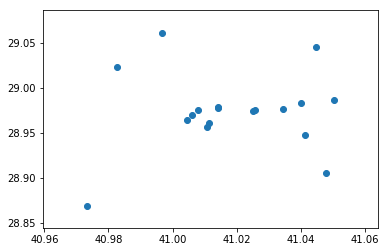

In [13]:
lati_list=dataframe_filtered.lat
longi_list=dataframe_filtered.lng
plt.scatter(lati_list,longi_list)

In [14]:
#combine two list into a 2 D array
coordinates=list(zip(lati_list,longi_list))


In [15]:
#create K-Means clusters with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(coordinates)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
#centrod values generated by the algorithm
print(kmeans.cluster_centers_)

[[41.00802653 29.04364524]
 [41.04463031 28.92685745]
 [40.97323574 28.86947971]
 [41.02040082 28.97342492]]


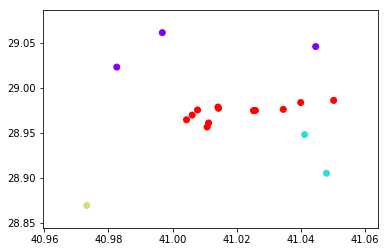

In [17]:
plt.scatter(lati_list, longi_list, c=kmeans.labels_, cmap='rainbow')

In [18]:
# change the cluster numbers to 
kmeans = KMeans(n_clusters=3)
kmeans.fit(coordinates)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
# location of the new centroids
print(kmeans.cluster_centers_)

[[41.02200252 28.9714942 ]
 [41.00802653 29.04364524]
 [41.01063669 28.88743451]]


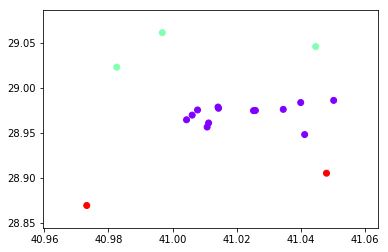

In [20]:
plt.scatter(lati_list, longi_list, c=kmeans.labels_, cmap='rainbow')

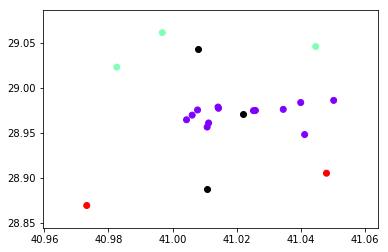

In [21]:
#plotting the data points in rainbow colors while the centroids are in black

plt.scatter(lati_list, longi_list, c=kmeans.labels_, cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [22]:
df_istanbul_refined["cluster labels"]=kmeans.labels_
#df_istanbul_refined=df_istanbul_refined.append(df_istanbul_refined["cluster labels"]).set_index("name")
df_istanbul_refined["cluster labels"]

0     0
1     0
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    1
13    0
14    0
15    0
16    2
17    2
Name: cluster labels, dtype: int32

In [23]:
#create a new dataframe with the index of the dataset and the labels as columns
cluster_map = pd.DataFrame()
cluster_map['df_istanbul_refined_index']=df_istanbul_refined.index.values
cluster_map['cluster']=kmeans.labels_

In [24]:
#filter all data points in cluster 0
cluster_map[cluster_map.cluster == 0]


,df_istanbul_refined_index,cluster
0,0,0
1,1,0
2,2,0
3,3,0
5,5,0
6,6,0
7,7,0
8,8,0
10,10,0
11,11,0


In [25]:
# get the info about members in cluster 0
cluster_0 = dataframe_filtered.drop([4,9,12,16,17])
cluster_0

,name,categories,address,city,distance,lat,lng
0,Galata Kulesi,Historic Site,Bereketzade Mah. Büyük Hendek Cad. Galata,Beyoğlu,2298,41.025862,28.975075
1,Historical GedikPaşa Bath Turkish Hammam,Spa,NaN,NaN,299,41.007799,28.975671
2,Historical Peninsula,Other Great Outdoors,NaN,İstanbul,591,41.006127,28.969930
3,Historical Kumkapı Restaurant,Seafood Restaurant,NaN,İstanbul,1024,41.004365,28.964739
5,Historical Preffered Hotel,Housing Development,NaN,NaN,1008,41.014194,28.978896
6,Historical Preferred Hotel Old City,Hotel,Nöbethane Cad. No:30 Sirkeci Fatih,İstanbul,1011,41.014333,28.977525
7,Historical Vezneciler Turkish Bath,Spa,Bozdogan Kemeri Cad. No. 2,İstanbul,1475,41.011254,28.961208
8,Historical Flat,Residential Building (Apartment / Condo),NaN,NaN,2232,41.025257,28.974894
10,Halat by Divan,Restaurant,Rahmi M. Koç Müzesi Hasköy Caddesi No:2 Hasköy...,İstanbul,4666,41.041223,28.948326
11,Blueway Hotel Hıstorıcal,Residential Building (Apartment / Condo),NaN,NaN,5073,41.050282,28.986289


In [26]:
cluster_map[cluster_map.cluster == 1]

,df_istanbul_refined_index,cluster
4,4,1
9,9,1
12,12,1


In [27]:
cluster_1= dataframe_filtered.drop([0,1,2,3,5,6,7,8,10,11,13,14,15,16,17])
cluster_1

,name,categories,address,city,distance,lat,lng
4,Historic Hamam and Sauna,Well,NaN,NaN,7284,41.044666,29.046116
9,Historical Martial Arts Association of İstanbu...,Martial Arts Dojo,"Caferağa, Moda Cad, No. 250",İstanbul,4642,40.982603,29.023261
12,Historical Roman Arena,Football Stadium,NaN,NaN,7176,40.996810,29.061559


In [28]:
cluster_map[cluster_map.cluster==2]

,df_istanbul_refined_index,cluster
16,16,2
17,17,2


In [29]:
cluster_2 =dataframe_filtered.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
cluster_2

,name,categories,address,city,distance,lat,lng
16,Panorama 1453 Historical Museum,History Museum,NaN,NaN,7662,41.048038,28.905389
17,Mini Historical Bazaar,Souvenir Shop,Ataköy 1. Kısım Mahallesi Rauf Orbay Caddesi N...,İstanbul,9702,40.973236,28.869480
